In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Import data 

In [4]:
data_2014 = pd.read_csv("CAD_data_through_2025/class_data_2014.csv", low_memory = False)
data_2015 = pd.read_csv("CAD_data_through_2025/class_data_2015.csv", low_memory = False)
data_2016 = pd.read_csv("CAD_data_through_2025/class_data_2016.csv", low_memory = False)
data_2017 = pd.read_csv("CAD_data_through_2025/class_data_2017.csv", low_memory = False)
data_2018 = pd.read_csv("CAD_data_through_2025/class_data_2018.csv", low_memory = False)
data_2019 = pd.read_csv("CAD_data_through_2025/class_data_2019.csv", low_memory = False)
data_2020 = pd.read_csv("CAD_data_through_2025/class_data_2020.csv", low_memory = False)
data_2021 = pd.read_csv("CAD_data_through_2025/class_data_2021.csv", low_memory = False)
data_2022 = pd.read_csv("CAD_data_through_2025/class_data_2022.csv", low_memory = False)
data_2023 = pd.read_csv("CAD_data_through_2025/class_data_2023.csv", low_memory = False)
data_2024 = pd.read_csv("CAD_data_through_2025/class_data_2024.csv", low_memory = False)
data_2025 = pd.read_csv("CAD_data_through_2025/class_data_2025.csv", low_memory = False)

In [5]:
data_2014["calltime"] = pd.to_datetime(data_2014["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2015["calltime"] = pd.to_datetime(data_2015["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2016["calltime"] = pd.to_datetime(data_2016["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2017["calltime"] = pd.to_datetime(data_2017["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2018["calltime"] = pd.to_datetime(data_2018["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2019["calltime"] = pd.to_datetime(data_2019["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2020["calltime"] = pd.to_datetime(data_2020["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2021["calltime"] = pd.to_datetime(data_2021["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2022["calltime"] = pd.to_datetime(data_2022["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2023["calltime"] = pd.to_datetime(data_2023["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2024["calltime"] = pd.to_datetime(data_2024["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2025["calltime"] = pd.to_datetime(data_2025["calltime"], format="%Y-%m-%d %H:%M:%S.%f")

In [6]:
cad_data = pd.concat([data_2014, data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024, data_2025], axis = 0)

In [7]:
len(cad_data.columns)

20

In [8]:
len(cad_data)

1488577

## Filter only for CAHOOTS calls

In [10]:
pattern = r"1J77\s*|3J79\s*|3J78\s*|3J77\s*|4J79\s*|3J81\s*|3J76\s*|2J28\s*|2J29\s*|CAHOOT\s*|CAHOT\s*|CAHO\s*"

In [11]:
def classify(call_sign):
    if pd.isna(call_sign):
        return "unknown"
    elif re.fullmatch(pattern, call_sign):
        return ("not police")
    else:
        return ("police")
cad_data["unittype"] = cad_data["primeunit"].apply(classify)

In [12]:
cad_data["responder"] = cad_data["primeunit"].fillna("").apply(lambda x: "cahoots" if re.fullmatch(pattern, x) else "police")

In [13]:
cad_data = cad_data.dropna(subset=["calltime"])
cad_data["date"] = cad_data["calltime"].dt.date
cad_data["hour"] = cad_data["calltime"].dt.hour

In [15]:
#cad_data.head()

In [16]:
cahoots_data = cad_data[cad_data["responder"] == "cahoots"]
#cahoots_data

In [17]:
def seasons(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

cahoots_data["season"] = cahoots_data["date"].apply(lambda x: seasons(x.month))
#cahoots_data.head()

/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_14349/3960293402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahoots_data["season"] = cahoots_data["date"].apply(lambda x: seasons(x.month))


In [18]:
cahoots_data.head()

,yr,service,inci_id,calltime,case_id,callsource,nature,closecode,closed_as,secs_to_disp,...,priority,zip,primeunit,units_dispd,units_arrived,unittype,responder,date,hour,season
44,2014,LAW,14000107,2014-01-01 01:55:39,NaN,PHONE,TRANSPORT,TRAN,TRANSPORT MADE,1213.0,...,5,97401,CAHOOT,1,1,not police,cahoots,2014-01-01,1,Winter
153,2014,LAW,14000382,2014-01-01 12:50:34,NaN,PHONE,TRANSPORT,ASST,ASSISTED,396.0,...,5,97401,CAHOOT,1,1,not police,cahoots,2014-01-01,12,Winter
170,2014,LAW,14000408,2014-01-01 13:29:17,NaN,PHONE,TRANSPORT,ASST,ASSISTED,505.0,...,5,97402,CAHOOT,1,1,not police,cahoots,2014-01-01,13,Winter
174,2014,LAW,14000414,2014-01-01 13:37:12,NaN,PHONE,CHECK WELFARE,DIS,DISREGARD,NaN,...,5,97401,CAHOOT,0,0,not police,cahoots,2014-01-01,13,Winter
176,2014,LAW,14000416,2014-01-01 13:38:38,NaN,PHONE,SUBJECT DOWN,ASST,ASSISTED,36.0,...,1,97402,CAHOOT,1,1,not police,cahoots,2014-01-01,13,Winter


In [19]:
def weekdays(day):
    if day == 0:
        return "Monday"
    elif day == 1:
        return "Tuesday"
    elif day == 2: 
        return "Wednesday"
    elif day == 3:
        return "Thursday"
    elif day == 4:
        return "Friday"
    elif day == 5:
        return "Saturday"
    elif day == 6:
        return "Sunday"

cahoots_data["day of the week"] = cahoots_data["date"].apply(lambda x: weekdays(x.weekday()))

/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_14349/24951610.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahoots_data["day of the week"] = cahoots_data["date"].apply(lambda x: weekdays(x.weekday()))


In [20]:
def months(month):
    if month == 1:
        return "January"
    elif month == 2:
        return "February"
    elif month == 3:
        return "March"
    elif month == 4:
        return "April"
    elif month == 5:
        return "May"
    elif month == 6:
        return "June"
    elif month == 7:
        return "July"
    elif month == 8:
        return "August"
    elif month == 9:
        return "September"
    elif month == 10:
        return "October"
    elif month == 11:
        return "November"
    elif month == 12:
        return "December"

cahoots_data["month"] = cahoots_data["date"].apply(lambda x: months(x.month))

/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_14349/3409519047.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahoots_data["month"] = cahoots_data["date"].apply(lambda x: months(x.month))


## Call volume dataframes

In [22]:
call_volume_season = cahoots_data.groupby(["season","yr"]).size().reset_index(name = "call_volume_season")
call_volume_hourly = cahoots_data.groupby(["hour", "yr"]).size().reset_index(name = "call_volume_hour")
call_volume_monthly = cahoots_data.groupby(["month", "yr"]).size().reset_index(name = "call_volume_month")
call_volume_weekday = cahoots_data.groupby(["day of the week", "yr"]).size().reset_index(name = "call_volume_weekday")

In [23]:
call_volume = pd.concat([call_volume_season, call_volume_hourly, call_volume_monthly, call_volume_weekday], axis = 1)
call_volume.head()

,season,yr,call_volume_season,hour,yr,call_volume_hour,month,yr,call_volume_month,day of the week,yr,call_volume_weekday
0,Fall,2014.0,2087.0,0,2014,362,April,2014.0,783.0,Friday,2014.0,1336.0
1,Fall,2015.0,2779.0,0,2015,383,April,2015.0,860.0,Friday,2015.0,1483.0
2,Fall,2016.0,3316.0,0,2016,476,April,2016.0,891.0,Friday,2016.0,1901.0
3,Fall,2017.0,4009.0,0,2017,526,April,2017.0,1301.0,Friday,2017.0,2309.0
4,Fall,2018.0,4202.0,0,2018,533,April,2018.0,1324.0,Friday,2018.0,2399.0


## Visualizations

Text(0.5, 1.0, 'Call Volume by Hour of the Day')

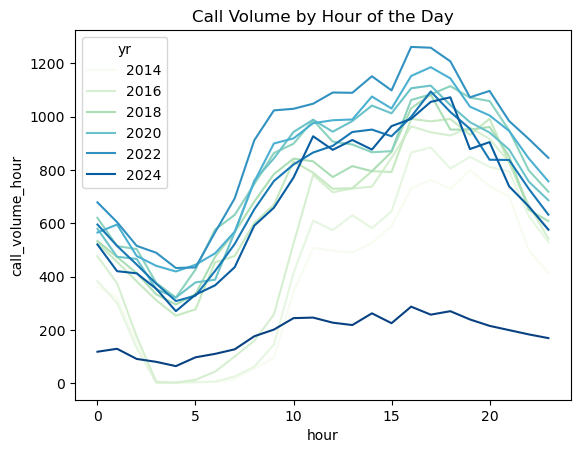

In [25]:
sns.lineplot(data = call_volume_hourly, x = "hour", y = "call_volume_hour", hue = "yr", palette = "GnBu")
plt.title("Call Volume by Hour of the Day")

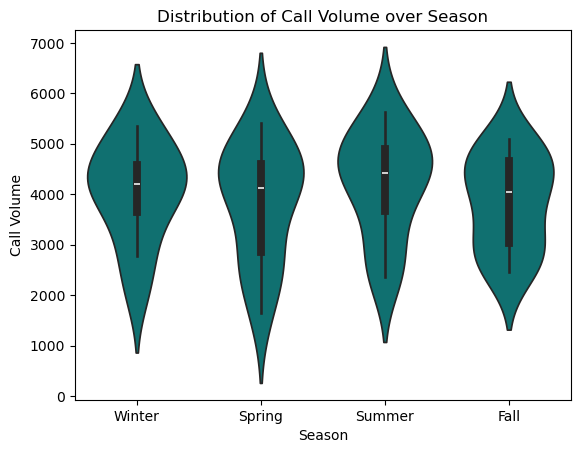

In [26]:
sns.violinplot(data = call_volume_season, x = "season", y = "call_volume_season", color = "teal")
plt.title("Distribution of Call Volume over Season")

labels = ["Winter", "Spring", "Summer", "Fall"]
xticks = [0, 1, 2, 3]

plt.xticks(ticks = xticks, labels = labels)
plt.ylabel("Call Volume")
plt.xlabel("Season");

Text(0.5, 0, 'Month')

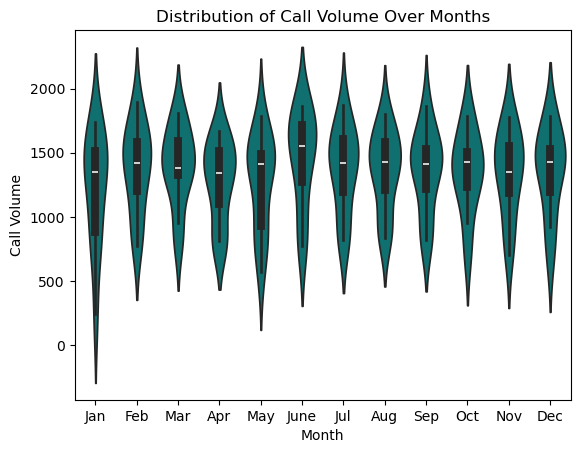

In [28]:
labels = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

sns.violinplot(data = call_volume_monthly, x = "month", y = "call_volume_month", color = "teal")
plt.xticks(ticks = xticks, labels = labels)
plt.title("Distribution of Call Volume Over Months")
plt.ylabel("Call Volume")
plt.xlabel("Month")


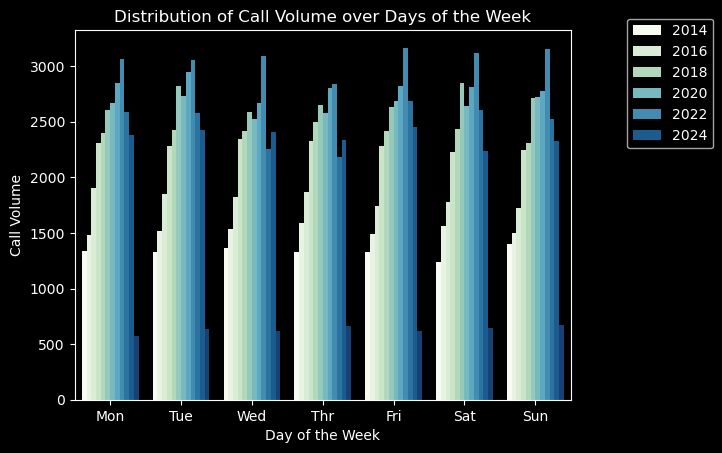

In [50]:
labels = ["Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"]
xticks = [0, 1, 2, 3, 4, 5, 6]

sns.barplot(data = call_volume_weekday, x = "day of the week", y = "call_volume_weekday", hue = "yr", palette = "GnBu")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(ticks = xticks, labels = labels)
plt.title("Distribution of Call Volume over Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Call Volume");

Text(0, 0.5, 'Hour')

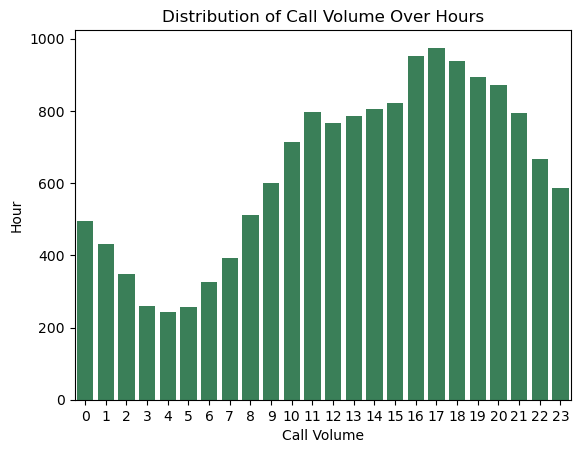

In [51]:
sns.barplot(data = call_volume_hourly, x = "hour", y = "call_volume_hour", color = "seagreen", errorbar = None)
plt.title("Distribution of Call Volume Over Hours")
plt.xlabel("Call Volume")
plt.ylabel("Hour")

## Kruskal Wallis Analysis

In [63]:
from scipy.stats import kruskal
groups = [group["call_volume_weekday"].values for _, group in call_volume_weekday.groupby("day of the week")]

h_stat, p_val = kruskal(*groups)

print("Kruskal-Wallis H-statistic for day of the week:", h_stat)
print("p-value for day of the week:", p_val)

Kruskal-Wallis H-statistic for day of the week: 0.4676659984205385
p-value for day of the week: 0.9982100005540023


In [69]:
groups = [group["call_volume_hour"].values for _, group in call_volume_hourly.groupby("hour")]

h_stat, p_val = kruskal(*groups)

print("Kruskal-Wallis H-statistic for hour:", h_stat)
print("p-value for hour:", p_val)

Kruskal-Wallis H-statistic for hour: 159.688894894416
p-value for hour: 1.915827071124772e-22


In [71]:
groups = [group["call_volume_season"].values for _, group in call_volume_season.groupby("season")]

h_stat, p_val = kruskal(*groups)

print("Kruskal-Wallis H-statistic for season:", h_stat)
print("p-value for season:", p_val)

Kruskal-Wallis H-statistic for season: 0.9739298629215227
p-value for season: 0.8075598048634895


In [73]:
groups = [group["call_volume_month"].values for _, group in call_volume_monthly.groupby("month")]

h_stat, p_val = kruskal(*groups)

print("Kruskal-Wallis H-statistic for month:", h_stat)
print("p-value for month:", p_val)

Kruskal-Wallis H-statistic for month: 3.990940644141354
p-value for month: 0.9701812805590705
